In [2]:
import networkx as nx
import numpy as np

import itertools
from collections import defaultdict

import random
import matplotlib.pyplot as plt
import pandas as pd

We must find the adjacency list of the graph in order to find a hamiltonian path from a specific starting node, and all possible hamiltonian paths if the starting node can be any node.

In [3]:
"""
finding adjacency list from graph
"""
def adjList(graph):
    adjList = [[] for _ in range(graph.number_of_nodes())]
    for (src, dest) in graph.edges():
        adjList[src].append(dest)
        adjList[dest].append(src)
    return adjList

"""
finding all hamiltonian paths from a starting vertex, requires adjacency list
"""
def hampath(graph, v, visited, path, c):
    n = graph.number_of_nodes()
    
    if len(path) == n:
        c.extend(path)
#         print(path)
        return
    
    adj_list = adjList(graph)
    
    for w in adj_list[v]:
        if not visited[w]:
            visited[w] = True
            path.append(w)

            hampath(graph, w, visited, path, c)

            visited[w] = False
            path.pop()
"""
finding all hamiltonian paths from starting from all possible vertices, requires adjacency list
"""
def findallHamPaths(graph):
    n = graph.number_of_nodes()
    allpaths = []
    for startV in range(n):
        path = [startV]
        c = []
        visited = [False] * n
        visited[startV] = True
        
        hampath(graph, startV, visited, path, c)
        final = [c[i * n:(i + 1) * n] for i in range((len(c) + n - 1) // n )]
        allpaths.append(final)
        allpathsflat = [item for sublist in allpaths for item in sublist]
    return allpathsflat

Create dummy dataset of tracks and the ```BPM``` track characteristic.

In [4]:
"""
creating dict of dicts of "songs" & attributes
"""
i_n = 5
i_list = list(range(i_n))
bpm_label = list(["BPM"] * i_n)
i_bpm = random.sample(range(80,200), i_n)

dic1 = defaultdict(dict)
for x,y,z in zip(i_list, bpm_label, i_bpm):
    dic1[x][y] = z

song_dict = dict(dic1)
print(song_dict)

{0: {'BPM': 172}, 1: {'BPM': 188}, 2: {'BPM': 197}, 3: {'BPM': 89}, 4: {'BPM': 102}}


With the created dictionary from above, we can create a hamiltonian graph of the song's index and ```BPM```.

[0, 1, 2, 3, 4]
172


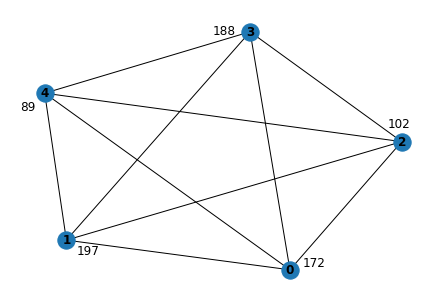

In [5]:
"""
creating and showing graph of song index & bpm
"""
sd_i = list(song_dict.keys())

print(sd_i)

g1 = nx.Graph()
g1.add_nodes_from(sd_i)
g1.add_edges_from(itertools.combinations(sd_i, 2))
nx.set_node_attributes(g1, song_dict)

print(g1.nodes[0]["BPM"])

pos = nx.spring_layout(g1)
nx.draw(g1, with_labels=True, font_weight='bold')
node_labels = nx.get_node_attributes(g1,'BPM')
nx.draw_networkx_labels(g1, pos,labels = node_labels)
plt.show()



A helper function to find all hamiltonian paths given a filtered graph.

In [6]:
"""
Finds all hamiltonian paths. 

Note: A fully connected graph should be n!
"""
allpaths = findallHamPaths(g1)

#show first 30 paths
allpaths[:30]

#print number of paths
print(len(allpaths))


120


Filter the ```BPM``` threshold of all of the paths.

In [7]:
"""
parse through paths

for this, took the difference in bpm between consecutive songs

if all the bpm differences were small (<=20), return them
"""
good_p = []
for p in allpaths:
    p_bpm = [g1.nodes[i]['BPM'] for i in p]
    p_bpmdiff = abs(np.diff(p_bpm))
    if all(i <=20 for i in p_bpmdiff)==True:
        good_p.append(p)
        print(p, p_bpm)

Create dummy dataset of tracks and the ```BPM``` and ```Danceability``` track characteristic.

In [8]:
i_n = 5
i_list = list(range(i_n))

#bpm
bpm_label = list(["BPM"] * i_n)
i_bpm = random.sample(range(80,200), i_n)

#bpm
danceability_label = list(["Danceability"] * i_n)
i_dance = [random.random() for i in range(i_n)]
# print(i_dance)

dict1 = list(zip(i_bpm, i_dance))
print(dict1)
pd1 = pd.DataFrame(dict1, columns=['BPM', 'Danceability'], index = i_list)
# pd1['song_id'] = i_list
pd1.head()


[(155, 0.815962419956913), (160, 0.0825054648387874), (129, 0.23385651864254742), (91, 0.787626825252653), (137, 0.4484638852572348)]


,BPM,Danceability
0,155,0.815962
1,160,0.082505
2,129,0.233857
3,91,0.787627
4,137,0.448464


Restructure data frame to a dictionary for easier data manipulation.

In [9]:
dftest = pd1.to_dict('index')
print(dftest)

{0: {'BPM': 155, 'Danceability': 0.815962419956913}, 1: {'BPM': 160, 'Danceability': 0.0825054648387874}, 2: {'BPM': 129, 'Danceability': 0.23385651864254742}, 3: {'BPM': 91, 'Danceability': 0.787626825252653}, 4: {'BPM': 137, 'Danceability': 0.4484638852572348}}


With the created dictionary from above, we can create a hamiltonian graph of the song's index, ```BPM```, and ```Danceability```.

155 0.815962419956913


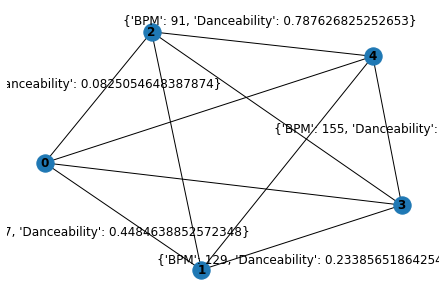

In [10]:
"""
creating and showing graph of song index & bpm & "danceability"
"""
df_i = list(dftest.keys())

g2 = nx.Graph()
g2.add_nodes_from(df_i)
g2.add_edges_from(itertools.combinations(df_i, 2))
nx.set_node_attributes(g2, dftest)

print(g2.nodes[0]['BPM'], g2.nodes[0]['Danceability'])

pos = nx.spring_layout(g2)
nx.draw(g2, with_labels=True, font_weight='bold')
nodeDance_labels = nx.get_node_attributes(g2,'Danceability')
nodeBPM_labels = nx.get_node_attributes(g2,'BPM')
nx.draw_networkx_labels(g2, pos,labels = dftest)
plt.show()

Filter the ```BPM``` and ```Danceability``` threshold of all of the paths.

In [12]:
"""
parse through paths

for this, took the difference of 
1. bpm between consecutive songs and summed them
2. danceability b/w songs and summed them
3. scaled/add weights to both attributes
4. sum total
5. sort weight sum, want the LOWEST
"""
good_p1 = {}
for p in allpaths[:20]:
#     p_id = [g2.nodes.i for i in p]
    p_bpm = [g2.nodes[i]['BPM'] for i in p]
    p_dance = [g2.nodes[i]['Danceability'] for i in p]
    p_bpmdiff = abs(np.diff(p_bpm))
    p_dancediff = 100*abs(np.diff(p_dance))
    print(p_bpmdiff, p_dancediff)
    p_rating = sum(p_bpmdiff) + sum(p_dancediff)
    good_p1[str(p)]= p_rating


sort_good_p1 = sorted(good_p1.items(), key=lambda x:x[1])
print(*sort_good_p1[:10], sep='\n')

[ 5 31 38 46] [73.34569551 15.13510538 55.37703066 33.916294  ]
[ 5 31  8 46] [73.34569551 15.13510538 21.46073666 33.916294  ]
[ 5 69 38  8] [73.34569551 70.51213604 55.37703066 21.46073666]
[ 5 69 46  8] [73.34569551 70.51213604 33.916294   21.46073666]
[ 5 23  8 38] [73.34569551 36.59584204 21.46073666 55.37703066]
[ 5 23 46 38] [73.34569551 36.59584204 33.916294   55.37703066]
[26 31 69 46] [58.21059013 15.13510538 70.51213604 33.916294  ]
[26 31 23 46] [58.21059013 15.13510538 36.59584204 33.916294  ]
[26 38 69 23] [58.21059013 55.37703066 70.51213604 36.59584204]
[26 38 46 23] [58.21059013 55.37703066 33.916294   36.59584204]
[26  8 23 69] [58.21059013 21.46073666 36.59584204 70.51213604]
[26  8 46 69] [58.21059013 21.46073666 33.916294   70.51213604]
[64 69 31  8] [ 2.83355947 70.51213604 15.13510538 21.46073666]
[64 69 23  8] [ 2.83355947 70.51213604 36.59584204 21.46073666]
[64 38 31 23] [ 2.83355947 55.37703066 15.13510538 36.59584204]
[64 38  8 23] [ 2.83355947 55.37703066 2